In [1]:
from scipy.integrate import solve_ivp
import sympy as sm
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D  
from matplotlib.ticker import LinearLocator
from matplotlib.colors import TwoSlopeNorm

In [2]:
#potential function
def gamma(sigma,alpha,beta): return ((alpha*beta)/2)*(1-sigma**2)-((alpha**2)/4)*sigma**2


# the ODE function: mu is the eigenvalue
def ODE_theta(x,y):
    sigma, theta = y ; 
    return [beta*(1-sigma**2),(mu-gamma(sigma,alpha,beta))*(np.cos(theta)**2)-(np.sin(theta))**2]
    

In [5]:
def jac(Y, alpha, beta, mu):
    sigma=Y[0]
    theta=Y[1]
    f1=-2*beta*sigma, 0
    f2=((np.cos(theta))**2)*((sigma*alpha**2)/2 +sigma*alpha*beta), (-2*np.cos(theta)*np.sin(theta))*(mu-(((alpha*beta)/2)*(1-sigma**2)-((alpha**2)/4)*sigma**2)+1)
    DF = sm.Matrix([f1,f2])
    return DF

In [7]:
mu=0; #set eval=0

In [9]:
#domain, initial conditions
t0=-100; #initial time
tf=100; #final time

pert=10**(-4) #perturbation for IC

In [13]:
#both

num_alpha_vals=100
num_beta_vals=100

range_theta_grid=np.empty([num_alpha_vals, num_beta_vals])

beta_range=np.linspace(-4,4,num_beta_vals); 
alpha_range=np.linspace(-4,4,num_alpha_vals);

range_theta_grid=np.empty([num_alpha_vals, num_beta_vals])

/var/folders/54/8hk9bxx12cl7dq1p1l1m9dz80015w9/T/ipykernel_75741/68112376.py:43: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  fp_pert[0]=fp[0]+evec_pert[0][0];
/var/folders/54/8hk9bxx12cl7dq1p1l1m9dz80015w9/T/ipykernel_75741/68112376.py:44: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  fp_pert[1]=fp[1]+evec_pert[0][1];


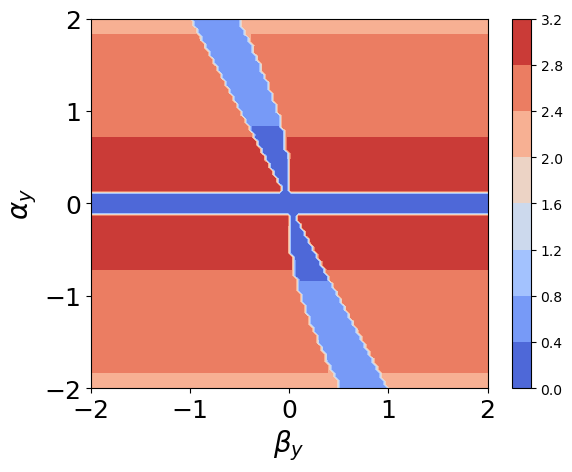

In [171]:
#all the values 


num_alpha_vals=100
num_beta_vals=100

range_theta_grid=np.empty([num_alpha_vals, num_beta_vals])

beta_range=np.linspace(-2,2,num_beta_vals); 
alpha_range=np.linspace(-2,2,num_alpha_vals);

range_theta_grid=np.empty([num_alpha_vals, num_beta_vals])


for i,alpha in enumerate(alpha_range):
    #print(i)
    #print("alpha= "+str(alpha))
    with np.errstate(over='ignore'):
        for j,beta in enumerate(beta_range):
            if (alpha>=0 and beta>=0):
                theta_0=-np.arctan(alpha/2)
                sigma_0=1 
            elif (alpha<0 and beta<0):
                theta_0=np.arctan(alpha/2) 
                sigma_0=-1 
            elif (alpha>=0 and beta<0):
                theta_0=-np.arctan(alpha/2) 
                sigma_0=-1 
            elif (alpha<0 and beta>=0):
                theta_0=np.arctan(alpha/2) 
                sigma_0=1 
        
    
            fp=[sigma_0,theta_0]
        
            matrix=jac(fp,alpha,beta, mu)
            einfo=matrix.eigenvects()
            evalue=einfo[0][0];
            evec=einfo[0][2];
            
            evec_pert=pert*np.asarray(evec);
            fp_pert=np.zeros(2);
            fp_pert[0]=fp[0]+evec_pert[0][0];
            fp_pert[1]=fp[1]+evec_pert[0][1];
           
        
            sol=solve_ivp(ODE_theta,[t0,tf],fp_pert,dense_output=True, method="RK45", rtol=10**(-13))
    
    
            t = np.linspace(t0,tf,10*tf)
            
            theta=sol.sol(t)[1]
    
            
           
              
            eval_cond=2*np.arctan(alpha/2)
            range_theta=abs(theta[-1]) #-theta[-1])
            
    
            range_theta_grid[i,j]=range_theta

Y = alpha_range
X = beta_range
X, Y = np.meshgrid(X, Y)
Z = range_theta_grid

# Plot the surface.
fig, ax = plt.subplots()
ax.tick_params(axis="both", which="major", labelsize=18)  

plot=ax.contourf(X, Y, Z, cmap=cm.coolwarm)#,norm=TwoSlopeNorm(0))#, levels=levels)

#plt.scatter(1,0.3, s=50, marker="*", color="black")
#plt.scatter(2,0.2, s=50, marker="*", color="black")
#plt.scatter(3,0.18, s=50, marker="*", color="black")
#plt.scatter(4,0.18, s=50, marker="*", color="black")

ax.set_ylabel(r"$\alpha_y$",fontsize=20)
ax.set_xlabel(r"$\beta_y$",fontsize=20)
#ax.contourf(X, Y, Z, cmap=cm.coolwarm)
           
# Add a color bar which maps values to colors.
fig.colorbar(plot)
#ax.set_box_aspect(aspect=(1,1,1))
plt.savefig("theta_f_contours.pdf",format='pdf',bbox_inches='tight')
plt.show()

/var/folders/54/8hk9bxx12cl7dq1p1l1m9dz80015w9/T/ipykernel_75741/2452445247.py:43: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  fp_pert[0]=fp[0]+evec_pert[0][0];
/var/folders/54/8hk9bxx12cl7dq1p1l1m9dz80015w9/T/ipykernel_75741/2452445247.py:44: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  fp_pert[1]=fp[1]+evec_pert[0][1];


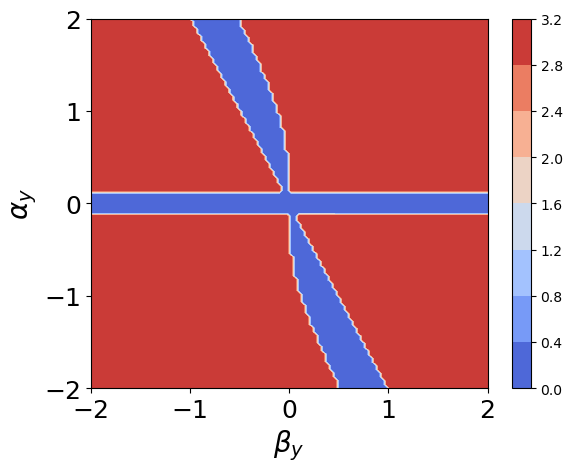

In [42]:
#all the values 


num_alpha_vals=100
num_beta_vals=100

range_theta_grid=np.empty([num_alpha_vals, num_beta_vals])

beta_range=np.linspace(-2,2,num_beta_vals); 
alpha_range=np.linspace(-2,2,num_alpha_vals);

range_theta_grid=np.empty([num_alpha_vals, num_beta_vals])


for i,alpha in enumerate(alpha_range):
    #print(i)
    #print("alpha= "+str(alpha))
    with np.errstate(over='ignore'):
        for j,beta in enumerate(beta_range):
            if (alpha>=0 and beta>=0):
                theta_0=-np.arctan(alpha/2)
                sigma_0=1 
            elif (alpha<0 and beta<0):
                theta_0=np.arctan(alpha/2) 
                sigma_0=-1 
            elif (alpha>=0 and beta<0):
                theta_0=-np.arctan(alpha/2) 
                sigma_0=-1 
            elif (alpha<0 and beta>=0):
                theta_0=np.arctan(alpha/2) 
                sigma_0=1 
        
    
            fp=[sigma_0,theta_0]
        
            matrix=jac(fp,alpha,beta, mu)
            einfo=matrix.eigenvects()
            evalue=einfo[0][0];
            evec=einfo[0][2];
            
            evec_pert=pert*np.asarray(evec);
            fp_pert=np.zeros(2);
            fp_pert[0]=fp[0]+evec_pert[0][0];
            fp_pert[1]=fp[1]+evec_pert[0][1];
           
        
            sol=solve_ivp(ODE_theta,[t0,tf],fp_pert,dense_output=True, method="RK45", rtol=10**(-13))
    
    
            t = np.linspace(t0,tf,10*tf)
            
            theta=sol.sol(t)[1]
    
            
           
              
            eval_cond=2*np.arctan(alpha/2)
            range_theta=abs(theta[-1]+theta[0])
            
    
            range_theta_grid[i,j]=range_theta

Y = alpha_range
X = beta_range
X, Y = np.meshgrid(X, Y)
Z = range_theta_grid

# Plot the surface.
fig, ax = plt.subplots()
ax.tick_params(axis="both", which="major", labelsize=18)  

plot=ax.contourf(X, Y, Z, cmap=cm.coolwarm)#,norm=TwoSlopeNorm(0))#, levels=levels)

#plt.scatter(1,0.3, s=50, marker="*", color="black")
#plt.scatter(2,0.2, s=50, marker="*", color="black")
#plt.scatter(3,0.18, s=50, marker="*", color="black")
#plt.scatter(4,0.18, s=50, marker="*", color="black")

ax.set_ylabel(r"$\alpha_y$",fontsize=20)
ax.set_xlabel(r"$\beta_y$",fontsize=20)
#ax.contourf(X, Y, Z, cmap=cm.coolwarm)
           
# Add a color bar which maps values to colors.
fig.colorbar(plot)
#ax.set_box_aspect(aspect=(1,1,1))
plt.savefig("accangle_contours_alt.pdf",format='pdf',bbox_inches='tight')
plt.show()

In [22]:
np.max( range_theta_grid)

3.1416372790308715

/var/folders/54/8hk9bxx12cl7dq1p1l1m9dz80015w9/T/ipykernel_75741/732991008.py:43: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  fp_pert[0]=fp[0]+evec_pert[0][0];
/var/folders/54/8hk9bxx12cl7dq1p1l1m9dz80015w9/T/ipykernel_75741/732991008.py:44: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  fp_pert[1]=fp[1]+evec_pert[0][1];


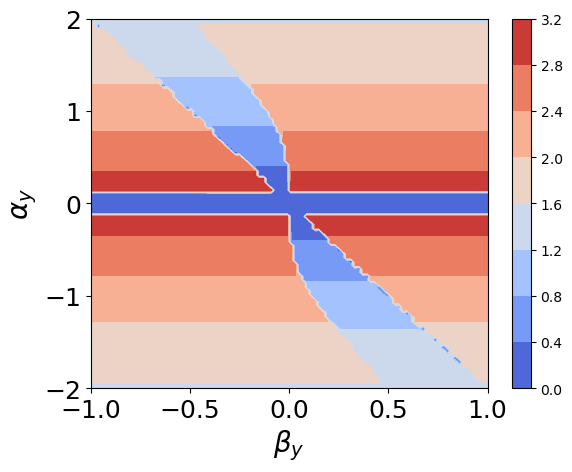

In [39]:
#all the values 


num_alpha_vals=100
num_beta_vals=100

range_theta_grid=np.empty([num_alpha_vals, num_beta_vals])

beta_range=np.linspace(-1,1,num_beta_vals); 
alpha_range=np.linspace(-2,2,num_alpha_vals);

range_theta_grid=np.empty([num_alpha_vals, num_beta_vals])


for i,alpha in enumerate(alpha_range):
    #print(i)
    #print("alpha= "+str(alpha))
    with np.errstate(over='ignore'):
        for j,beta in enumerate(beta_range):
            if (alpha>=0 and beta>=0):
                theta_0=-np.arctan(alpha/2)
                sigma_0=1 
            elif (alpha<0 and beta<0):
                theta_0=np.arctan(alpha/2) 
                sigma_0=-1 
            elif (alpha>=0 and beta<0):
                theta_0=-np.arctan(alpha/2) 
                sigma_0=-1 
            elif (alpha<0 and beta>=0):
                theta_0=np.arctan(alpha/2) 
                sigma_0=1 
        
    
            fp=[sigma_0,theta_0]
        
            matrix=jac(fp,alpha,beta, mu)
            einfo=matrix.eigenvects()
            evalue=einfo[0][0];
            evec=einfo[0][2];
            
            evec_pert=pert*np.asarray(evec);
            fp_pert=np.zeros(2);
            fp_pert[0]=fp[0]+evec_pert[0][0];
            fp_pert[1]=fp[1]+evec_pert[0][1];
           
        
            sol=solve_ivp(ODE_theta,[t0,tf],fp_pert,dense_output=True, method="RK45", rtol=10**(-13))
    
    
            t = np.linspace(t0,tf,10*tf)
            
            theta=sol.sol(t)[1]
    
            
           
              
            eval_cond=2*np.arctan(alpha/2)
            range_theta=abs(theta[0]-theta[-1])
            
    
            range_theta_grid[i,j]=range_theta

Y = alpha_range
X = beta_range
X, Y = np.meshgrid(X, Y)
Z = range_theta_grid

# Plot the surface.
fig, ax = plt.subplots()
ax.tick_params(axis="both", which="major", labelsize=18)  

plot=ax.contourf(X, Y, Z, cmap=cm.coolwarm)#,norm=TwoSlopeNorm(0))#, levels=levels)

#plt.scatter(1,0.3, s=50, marker="*", color="black")
#plt.scatter(2,0.2, s=50, marker="*", color="black")
#plt.scatter(3,0.18, s=50, marker="*", color="black")
#plt.scatter(4,0.18, s=50, marker="*", color="black")

ax.set_ylabel(r"$\alpha_y$",fontsize=20)
ax.set_xlabel(r"$\beta_y$",fontsize=20)
#ax.contourf(X, Y, Z, cmap=cm.coolwarm)
           
# Add a color bar which maps values to colors.
fig.colorbar(plot)
#ax.set_box_aspect(aspect=(1,1,1))
#plt.savefig("accangle_contours.pdf",format='pdf',bbox_inches='tight')
plt.show()